In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Find the fit for the sharp 20-150cm range sensor
$r = k_1 + \frac{k_2}{k_3 + adc}$

In [5]:
# import the data
data = np.loadtxt("Expermental.csv", delimiter=",", skiprows=1)
r = data[:,0]
adc = data[:,1]

In [12]:
# Fitting model
def model(r, k):
    return k[0] + k[1] / (r+k[2])

In [13]:
# Less squares function
def modelLSF(r, v, iterations=10):
    N = len(r)
    k = np.zeros(3)
    A = np.ones((N, 3))

    for i in range(iterations):
        # Find the jacobian
        for n in range(N):
            A[n, 1] = 1 / (r[n] + k[2])
            A[n, 2] = -k[1] / (r[n] + k[2])**2

        # Find least squares solution
        deltaK, residuals, rank, s = np.linalg.lstsq(A, v - model(r, k))
        k += deltaK

    return k

### Perform fit

/var/folders/3_/2cspl15s35710jj272nm425r0000gt/T/ipykernel_12199/2517645013.py:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  deltaK, residuals, rank, s = np.linalg.lstsq(A, v - model(r, k))


Text(0, 0.5, 'ADC')

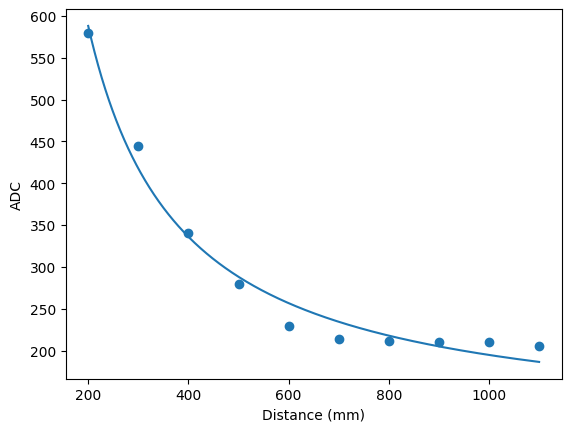

In [20]:
k = modelLSF(r, adc, 300)

# Plot the data
r1 = np.linspace(200, 1100, 1000)
v1 = model(r1, k)

plt.scatter(r, adc)
plt.plot(r1, v1)
plt.xlabel("Distance (mm)")
plt.ylabel("ADC")

In [21]:
print("k = ", k)

k =  [ 1.04582904e+02  8.88879484e+04 -1.60976155e+01]
